In [ ]:
!pip install pandas matplotlib

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#전국 고속도로 교통사고량 월별 통계

# 데이터 파일들이 있는 폴더 경로
folder_path = '../2022고속도로별 교통사고내역csv로 변환'

# 빈 딕셔너리 생성
accident_counts = {}

# 폴더 내의 파일 목록 얻기
files = os.listdir(folder_path)

# 각 파일에 대해 처리
for file in files:
    if file.endswith('.csv'):
        # 파일 경로
        file_path = os.path.join(folder_path, file)
        
        # 파일 읽기
        df = pd.read_csv(file_path, encoding='cp949')
        
        # 고속도로명 추출
        highway_name = file.split('2022')[1].split('.')[0]
        
        # 교통사고 횟수 계산
        accident_count = len(df)
        
        # 딕셔너리에 추가 또는 누적
        if highway_name in accident_counts:
            accident_counts[highway_name] += accident_count
        else:
            accident_counts[highway_name] = accident_count


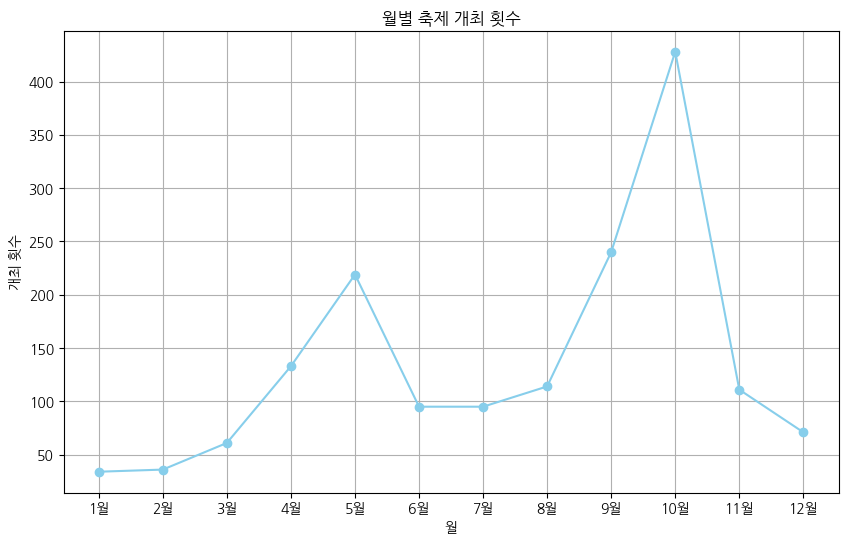

In [24]:

# CSV 파일 읽기
df = pd.read_csv('전국문화축제표준데이터.csv', encoding='cp949')

# '축제시작일자' 컬럼을 datetime 형식으로 변환
df['축제시작일자'] = pd.to_datetime(df['축제시작일자'])

# '축제시작일자' 컬럼을 기준으로 월별 갯수 계산
df['월'] = df['축제시작일자'].dt.month
monthly_counts = df['월'].value_counts().sort_index()

# 그래프 그리기 (꺾은선 그래프)
plt.figure(figsize=(10, 6))

# Set the font family to one that supports Korean characters
plt.rcParams['font.family'] = 'NanumGothic'

plt.plot(monthly_counts.index, monthly_counts.values, marker='o', color='skyblue', linestyle='-')
plt.title('월별 축제 개최 횟수')
plt.xlabel('월')
plt.ylabel('개최 횟수')
plt.xticks(monthly_counts.index, labels=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
plt.grid(True)
plt.show()


In [ ]:
pip install folium

In [57]:
import folium
import pandas as pd
import os

# Load the festival data from the CSV file
df = pd.read_csv('전국문화축제표준데이터.csv', encoding='cp949')

# '축제시작일자' 컬럼을 datetime 형식으로 변환
df['축제시작일자'] = pd.to_datetime(df['축제시작일자'])

# Filter data for the year 2022
df_2022 = df[df['축제시작일자'].dt.year == 2022]

# Drop rows with missing latitude or longitude values
df_2022 = df_2022.dropna(subset=['위도', '경도'])

# '축제시작일자' 컬럼을 기준으로 월별로 데이터를 나눔
monthly_data = [df_2022[df_2022['축제시작일자'].dt.month == month] for month in range(1, 13)]

# Create a base map centered around South Korea
map_center = [36.5, 127.5]

# Create the directory to save maps if it doesn't exist
output_directory = '22년월별축제위치'
os.makedirs(output_directory, exist_ok=True)

# Add festival markers to the map for each month
for month, data in enumerate(monthly_data, start=1):
    folium_map = folium.Map(location=map_center, zoom_start=7)

    for index, festival in data.iterrows():
        folium.Marker(
            location=[festival['위도'], festival['경도']],
            popup=festival['축제명'],
            icon=folium.Icon(color='blue'),
        ).add_to(folium_map)

    # Save the map for each month
    map_filename = os.path.join(output_directory, f"monthly_festival_map_{month}.html")
    folium_map.save(map_filename)
    print(f"Map for month {month} saved to {map_filename}")

# Display the last saved map
folium_map


Map for month 1 saved to 22년월별축제위치\monthly_festival_map_1.html
Map for month 2 saved to 22년월별축제위치\monthly_festival_map_2.html
Map for month 3 saved to 22년월별축제위치\monthly_festival_map_3.html
Map for month 4 saved to 22년월별축제위치\monthly_festival_map_4.html
Map for month 5 saved to 22년월별축제위치\monthly_festival_map_5.html
Map for month 6 saved to 22년월별축제위치\monthly_festival_map_6.html
Map for month 7 saved to 22년월별축제위치\monthly_festival_map_7.html
Map for month 8 saved to 22년월별축제위치\monthly_festival_map_8.html
Map for month 9 saved to 22년월별축제위치\monthly_festival_map_9.html
Map for month 10 saved to 22년월별축제위치\monthly_festival_map_10.html
Map for month 11 saved to 22년월별축제위치\monthly_festival_map_11.html
Map for month 12 saved to 22년월별축제위치\monthly_festival_map_12.html


In [86]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the CSV file with the correct encoding
df = pd.read_csv('강원도사고데이터(위경도추가).csv', encoding='utf-8')

# Create a folium map centered around the first data point
map_center = [df['위도'].iloc[0], df['경도'].iloc[0]]
mymap = folium.Map(location=map_center, zoom_start=10)

# Add markers for each data point using MarkerCluster for better performance
marker_cluster = MarkerCluster().add_to(mymap)

for index, row in df.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"Accident Type: {row['_GC_TYPE']}<br>Address: {row['_CLEANADDR']}",
        icon=folium.Icon(color='red')
    ).add_to(marker_cluster)

# Save the map to an HTML file
mymap.save('accident_map.html')
from IPython.display import IFrame

# Save the map to an HTML file
mymap.save('accident_map.html')

# Display the map in the notebook
IFrame(src='accident_map.html', width=700, height=600)



In [95]:
import os
import pandas as pd

#전체 2022 고속도로 교통사고 데이터 만들기
# Folder path containing CSV files
folder_path = '../2022고속도로별 교통사고내역csv로 변환'

# List to store DataFrames for each CSV file
dfs = []

# Loop through each CSV file in the folder
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        # Read CSV file
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, encoding='cp949')

        # Append DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_data.csv', index=False, encoding='utf-8-sig')

print("Combined data saved to combined_data.csv")


Combined data saved to combined_data.csv


In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Load the combined CSV file with 'utf-8-sig' encoding
combined_df = pd.read_csv('combined_data.csv', encoding='utf-8-sig')

# Extract month from the '사고일시' column
combined_df['사고일시'] = pd.to_datetime(combined_df['사고일시'], format='%Y년 %m월 %d일 %H시')
combined_df['월'] = combined_df['사고일시'].dt.month

# Initialize an empty DataFrame to store the top 5 cities for each month
top5_cities_by_month_df = pd.DataFrame(index=range(1, 6))

# Loop through each month
for month in range(1, 13):
    # Filter data for the current month
    month_data = combined_df[combined_df['월'] == month]

    # Extract city names
    cities = month_data['시군구']

    # Aggregate city-wise accident counts
    city_counts = cities.value_counts()

    # Get the top 5 cities
    top5_cities = city_counts.head(5)

    # Add the top 5 cities to the DataFrame
    top5_cities_by_month_df[month] = top5_cities.index

# Display the results
print(top5_cities_by_month_df)


              1              2              3                4   \
1    경기도 구리시 토평동  서울특별시 강동구 강일동    경기도 평택시 청북읍    서울특별시 강동구 강일동   
2    경기도 이천시 마장면  서울특별시 서초구 원지동    경기도 구리시 토평동      경기도 하남시 춘궁동   
3  서울특별시 서초구 원지동    경기도 화성시 팔탄면    경기도 여주시 가남읍  경기도 용인시 기흥구 신갈동   
4  인천광역시 부평구 삼산동  인천광역시 부평구 삼산동  서울특별시 강동구 강일동  경기도 용인시 처인구 양지면   
5     경기도 부천시 내동   경기도 하남시 하산곡동    경기도 하남시 춘궁동       경기도 오산시 원동   

                5                6                7                8   \
1      경기도 양주시 장흥면    서울특별시 강동구 강일동      경기도 구리시 토평동      경기도 구리시 토평동   
2     경상남도 김해시 대동면      경기도 평택시 청북읍  경기도 용인시 기흥구 신갈동    인천광역시 부평구 일신동   
3      경기도 구리시 토평동      경기도 안성시 원곡면      경기도 화성시 방교동      경기도 양주시 장흥면   
4  경기도 용인시 기흥구 상갈동      경기도 구리시 토평동     경상남도 김해시 대동면   부산광역시 강서구 대저1동   
5  경기도 성남시 수정구 금토동  경기도 안산시 상록구 부곡동    인천광역시 부평구 일신동  경기도 수원시 영통구 이의동   

              9                10               11               12  
1    경기도 구리시 토평동      경기도 여주시 가남읍  경기도 용인시 기흥구 신갈동      경기도 구리시 토평동  
2  인천광역시 부평구 삼산동  